In [1]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import sklearn.neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.preprocessing import scale
from collections import Counter
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('6Combinations.csv')
df = df.sample(frac = 1) # Shuffle a Dataframe rows
df.head()

,1disk,2disk,3disk,4disk,5disk,6disk,5.00E+01,5.20E+01,5.40E+01,5.60E+01,...,1.58E+03.3,1.58E+03.4,1.59E+03,1.59E+03.1,1.59E+03.2,1.59E+03.3,1.59E+03.4,1.60E+03,1.60E+03.1,1.60E+03.2
214,0.5,0.1,0.6,0.2,0.3,0.4,0.131,0.180,0.158,0.161,...,0.1470,0.1480,0.1470,0.1480,0.1490,0.1470,0.1460,0.1470,0.1470,0.1470
30,0.1,0.3,0.4,0.2,0.5,0.6,0.167,0.194,0.184,0.199,...,0.0792,0.0800,0.0791,0.0789,0.0793,0.0791,0.0796,0.0806,0.0800,0.0790
397,0.6,0.3,0.2,0.4,0.1,0.5,0.132,0.152,0.133,0.130,...,0.1640,0.1630,0.1610,0.1620,0.1610,0.1590,0.1580,0.1580,0.1570,0.1560
104,0.2,0.3,0.5,0.4,0.1,0.6,0.104,0.144,0.124,0.119,...,0.0941,0.0941,0.0933,0.0940,0.0941,0.0931,0.0931,0.0943,0.0942,0.0937
326,0.3,0.4,0.5,0.1,0.2,0.6,0.133,0.147,0.152,0.172,...,0.1260,0.1230,0.1200,0.1190,0.1180,0.1150,0.1140,0.1120,0.1110,0.1100


In [3]:
# Specifying the X and Y
X_train=df.iloc[:,:6]
Y_train=df.iloc[:,6:]

# Splitting data into 70:30 train:test ratio
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3,random_state=33)

In [4]:
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=3)

In [5]:
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(Y_train, train_preds)
rmse = sqrt(mse)
rmse

0.0778269970779456

In [6]:
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(Y_train, train_preds)
rmse = sqrt(mse)
rmse

0.0778269970779456

In [7]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(Y_test, test_preds)
rmse = sqrt(mse)
rmse

0.10439681014563114

In [8]:
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [9]:
gridsearch.best_params_

{'n_neighbors': 3}

In [10]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(Y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
train_mae = mean_absolute_error(Y_train, train_preds_grid)
train_mape = mean_absolute_percentage_error(Y_train, train_preds_grid)

test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(Y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_mae = mean_absolute_error(Y_test, test_preds_grid)
print("Train MSE is ",train_mse)
print("Train RMSE is ",train_rmse)
print("Train MAE is ", train_mae)
print("Train MAPE is ", train_mape)

print("Test MSE is ",test_mse)
print("Test RMSE is ",test_rmse)
print("Tset MAE is ", test_mae)

Train MSE is  0.0060570414741705535
Train RMSE is  0.0778269970779456
Train MAE is  0.04661199665562101
Train MAPE is  0.159513448377355
Test MSE is  0.010898693968582953
Test RMSE is  0.10439681014563114
Tset MAE is  0.06441854274054983


In [11]:
parameters = {"n_neighbors": range(1, 50), "weights": ["uniform", "distance"]}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, Y_train)
GridSearchCV(estimator=KNeighborsRegressor(), param_grid={'n_neighbors': range(1, 50),'weights': ['uniform', 'distance']})
print(gridsearch.best_params_)
{'n_neighbors': 25, 'weights': 'distance'}

test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(Y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_mae = mean_absolute_error(Y_test, test_preds_grid)
test_mape = mean_absolute_percentage_error(Y_test, test_preds_grid)
print("Test MSE is ", test_mse)
print("Test RMSE is ", test_rmse)
print("Test MAE is ", test_mae)
print("Test MAPE is ", test_mape)

{'n_neighbors': 3, 'weights': 'distance'}
Test MSE is  0.010691550799759609
Test RMSE is  0.10339995551140053
Test MAE is  0.06389561168204183
Test MAPE is  0.2309201453877634


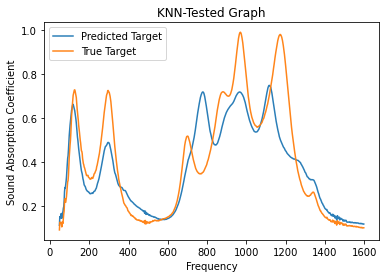

In [12]:
freq_range = range(48,1600,2)

plt.plot(freq_range, test_preds_grid[38], "-", alpha=14,label="Predicted Target")
plt.plot(freq_range, Y_test.iloc[38], "-", alpha=14, label="True Target")
plt.xlabel("Frequency")
plt.ylabel("Sound Absorption Coefficient")
plt.legend()
plt.title("KNN-Tested Graph")
plt.show()

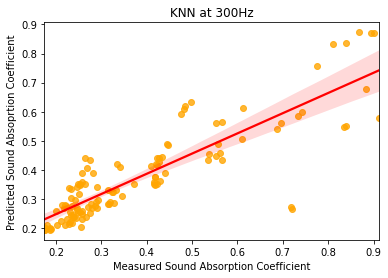

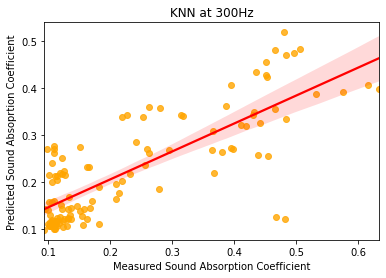

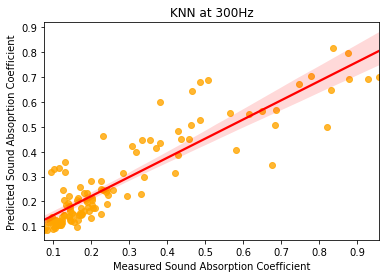

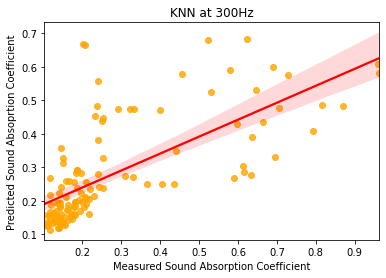

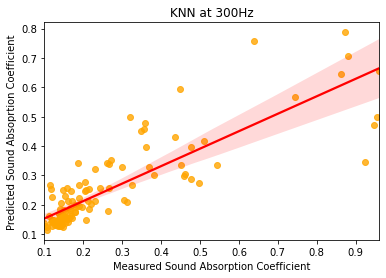

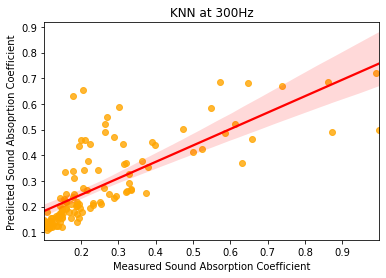

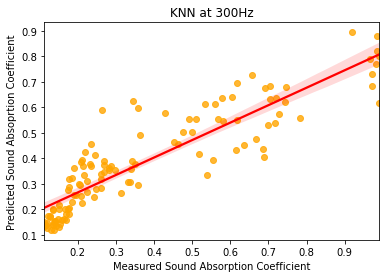

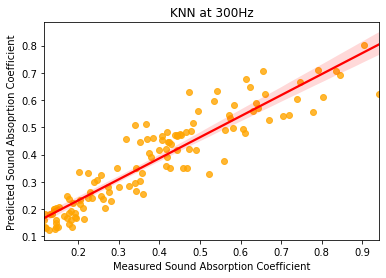

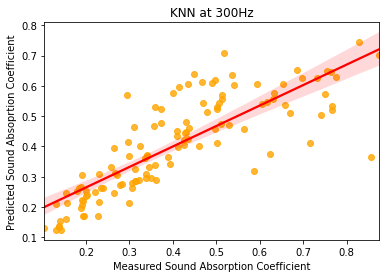

In [13]:
knn_reg = sns.regplot(x=Y_test.iloc[:,50], y=test_preds_grid[:,50], scatter_kws={"color": "orange"}, line_kws={"color": "red"})
plt.xlabel("Measured Sound Absorption Coefficient")
plt.ylabel("Predicted Sound Absoprtion Coefficient")
plt.title("KNN at 300Hz")
plt.show()

knn_reg = sns.regplot(x=Y_test.iloc[:,100], y=test_preds_grid[:,100], scatter_kws={"color": "orange"}, line_kws={"color": "red"})
plt.xlabel("Measured Sound Absorption Coefficient")
plt.ylabel("Predicted Sound Absoprtion Coefficient")
plt.title("KNN at 300Hz")
plt.show()

knn_reg = sns.regplot(x=Y_test.iloc[:,150], y=test_preds_grid[:,150], scatter_kws={"color": "orange"}, line_kws={"color": "red"})
plt.xlabel("Measured Sound Absorption Coefficient")
plt.ylabel("Predicted Sound Absoprtion Coefficient")
plt.title("KNN at 300Hz")
plt.show()

knn_reg = sns.regplot(x=Y_test.iloc[:,200], y=test_preds_grid[:,200], scatter_kws={"color": "orange"}, line_kws={"color": "red"})
plt.xlabel("Measured Sound Absorption Coefficient")
plt.ylabel("Predicted Sound Absoprtion Coefficient")
plt.title("KNN at 300Hz")
plt.show()

knn_reg = sns.regplot(x=Y_test.iloc[:,250], y=test_preds_grid[:,250], scatter_kws={"color": "orange"}, line_kws={"color": "red"})
plt.xlabel("Measured Sound Absorption Coefficient")
plt.ylabel("Predicted Sound Absoprtion Coefficient")
plt.title("KNN at 300Hz")
plt.show()

knn_reg = sns.regplot(x=Y_test.iloc[:,300], y=test_preds_grid[:,300], scatter_kws={"color": "orange"}, line_kws={"color": "red"})
plt.xlabel("Measured Sound Absorption Coefficient")
plt.ylabel("Predicted Sound Absoprtion Coefficient")
plt.title("KNN at 300Hz")
plt.show()

knn_reg = sns.regplot(x=Y_test.iloc[:,350], y=test_preds_grid[:,350], scatter_kws={"color": "orange"}, line_kws={"color": "red"})
plt.xlabel("Measured Sound Absorption Coefficient")
plt.ylabel("Predicted Sound Absoprtion Coefficient")
plt.title("KNN at 300Hz")
plt.show()

knn_reg = sns.regplot(x=Y_test.iloc[:,400], y=test_preds_grid[:,400], scatter_kws={"color": "orange"}, line_kws={"color": "red"})
plt.xlabel("Measured Sound Absorption Coefficient")
plt.ylabel("Predicted Sound Absoprtion Coefficient")
plt.title("KNN at 300Hz")
plt.show()

knn_reg = sns.regplot(x=Y_test.iloc[:,450], y=test_preds_grid[:,450], scatter_kws={"color": "orange"}, line_kws={"color": "red"})
plt.xlabel("Measured Sound Absorption Coefficient")
plt.ylabel("Predicted Sound Absoprtion Coefficient")
plt.title("KNN at 300Hz")
plt.show()

In [15]:
# Pearson's Correlation Coefficient 
import scipy
z = np.array([100, 200, 300, 400, 500, 600])
for i in range(6):
    x = Y_test.iloc[:,z[i]]
    y = test_preds_grid[:,z[i]]
    Hz_pearson_coef = scipy.stats.pearsonr(x,y)
    Hz_pearson_coef = Hz_pearson_coef[0]
    print("Pearson's correlation coefficen for", z[i], "Hz is", Hz_pearson_coef)

Pearson's correlation coefficen for 100 Hz is 0.7925656933025098
Pearson's correlation coefficen for 200 Hz is 0.6949931465623103
Pearson's correlation coefficen for 300 Hz is 0.7518575574077678
Pearson's correlation coefficen for 400 Hz is 0.9203583568896058
Pearson's correlation coefficen for 500 Hz is 0.9130408544577453
Pearson's correlation coefficen for 600 Hz is 0.8567413597286282
